In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataset = pd.read_csv(url, usecols=[1], engine='python', skipfooter=3)
dataset.head(12)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataset = pd.read_csv(url, usecols=[1], engine='python', skipfooter=3)

# Convert the dataset to a numpy array
data = dataset.values.astype('float32')

# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
# Create the training data
window_size = 12
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the training data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the testing data
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the testing data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
import tensorflow as tf

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=64)

Epoch 1/300
2/2 [==============================] - 3s 23ms/step - loss: 0.2816
Epoch 2/300
2/2 [==============================] - 0s 21ms/step - loss: 0.2272
Epoch 3/300
2/2 [==============================] - 0s 22ms/step - loss: 0.1797
Epoch 4/300
2/2 [==============================] - 0s 20ms/step - loss: 0.1382
Epoch 5/300
2/2 [==============================] - 0s 18ms/step - loss: 0.1027
Epoch 6/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0730
Epoch 7/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0476
Epoch 8/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0303
Epoch 9/300
2/2 [==============================] - 0s 18ms/step - loss: 0.0192
Epoch 10/300
2/2 [==============================] - 0s 21ms/step - loss: 0.0182
Epoch 11/300
2/2 [==============================] - 0s 24ms/step - loss: 0.0235
Epoch 12/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0278
Epoch 13/300
2/2 [==============================]

2/2 [==============================] - 2s 13ms/step


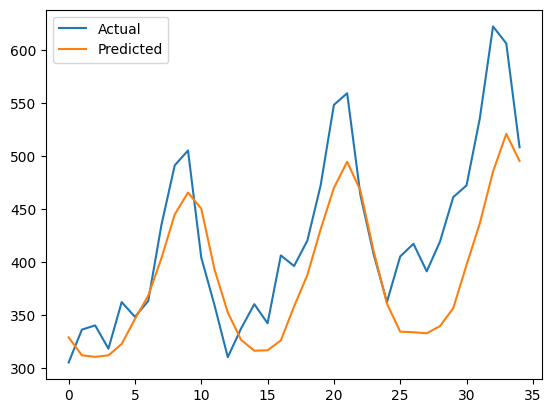

In [ ]:

# Evaluate the model on the test data
mse = model.evaluate(X_test, y_test)

# Make predictions on the test data
predictions = model.predict(X_test)

# Denormalize the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()